<center>
    <h1> INF510 - Computational Numerical Methods  </h1>
    <h2> Homework #1 </h2> 
</center>

_Notebook created by Martín Villanueva - `martin.villanueva@alumnos.usm.cl` - **rol:** 201104012-0_. DI UTFSM. August 2016.

In [1]:
%matplotlib inline
import numba
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import scipy as sp
import scipy.optimize
import sympy as sym

## Table of Contents
* [Question I](#1)
* [Question II](#2)
* [Question III](#3)
* [Question IV](#4)
* [Question V](#5)
* [Question VI](#6)
* [Question VII](#7)
* [Question VIII](#8)
* [Question IX](#9)
* [Question X](#10)
* [Question XI](#11)
* [Question XII](#12)
* [Question XIII](#13)
* [Question XIV](#14)
* [Question XV](#15)
* [Question XVI](#16)

<div id='1' />
## Question I

### (a) Singular matrix

There are many equivalent ways of defining such matrices. The most simple: A square matrix $A$ is singular if it don't have an inverse. Next a list of equivalent properties are listed:
* Not full-rank.
* $\text{det}(A)=0$.
* The columns and rows of $A$ are linearly independent.
* $A$ has at least some $0$ eigenvalue.
* etc.

### (b) Vandermonde Matrix

This matrix appear when we try to solve the problem of polynomial interpolation of set of points. Let $p(x)=\alpha_0 + \alpha_1 x + \cdots + \alpha_{n-1} x^{n-1}$ and a set of $n$ points $S=\{(x_k,y_k): \ k=1:n\}$. Then by doing $p(x_k)=y_k$ we get:
$$ V={\begin{bmatrix}1&x _{1}&x _{1}^{2}&\dots &x _{1}^{n-1}\\1&x _{2}&x _{2}^{2}&\dots &x _{2}^{n-1}\\1&x _{3}&x _{3}^{2}&\dots &x _{3}^{n-1}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x _{n}&x _{n}^{2}&\dots &x _{n}^{n-1}\end{bmatrix}}
$$
The major problem with such matrix, is that it is known to be ill-conditioned, so solving the system $V \mathbf{\alpha} = \mathbf{y}$ is not the way to find the coefficients of $p$.

### (c) Symmetric Matrix

A symmetric matrix $A$ is a square real matrix, that is equal to its transpose: $A^T = A$. Some important properties:
* The sum and difference of two symmetric matrices is again symmetric.
* Symmetric matrices are diagonalizable.
* All its eigenvalues are real, and eigenvectors are linearly independent.

### (d) Hermitian Matrix

This is the extension of symmetric matrices, for complex valued matrix. A complex matrix $A$ is hermitian, if it's equal to its conjugate transpose: $A^* = A$. Some important properties:
* The entries of the diagonal are all real.
* Hermitian matrices are diagonalizable.
* All its eigenvalues are real, and eigenvectors are linearly independent.

### (e) Skew-Hermitian Matrix
A complex valued matrix $A$ is skew-hermitian, if it conjugate transpose is equal to its negative: $A^* = -A$. Some important properties:
* The eigenvalues of a skew-Hermitian matrix are all purely imaginary or zero
* They are diagonalizable.
* All entries on the main diagonal of a skew-Hermitian matrix have to be pure imaginary.

### (f) Unitary Matrix

A square matrix $U$ is unitary if it conjugate transpose $U^*$ is his inverse: $UU^* = U^* U = I$. The most important properties are:

* All his columns are pairwise orthonormal (orthogonal and unitary).
* It doesn't change the norm $||\cdot||_2$ under multiplication by vectors: $||Ux||_2 = ||x||$.

### (g) Jacobian Matrix
Given a vectorial function $\mathbf{f}: \mathbb{R}^n \rightarrow \mathbb{R}^m$, the Jacobian matrix of $\mathbf{J}$ of $\mathbf{f}$ is as follows:
$$
\mathbf {J} ={\frac {d\mathbf {f} }{d\mathbf {x} }}={\begin{bmatrix}{\dfrac {\partial \mathbf {f} }{\partial x_{1}}}&\cdots &{\dfrac {\partial \mathbf {f} }{\partial x_{n}}}\end{bmatrix}}={\begin{bmatrix}{\dfrac {\partial f_{1}}{\partial x_{1}}}&\cdots &{\dfrac {\partial f_{1}}{\partial x_{n}}}\\\vdots &\ddots &\vdots \\{\dfrac {\partial f_{m}}{\partial x_{1}}}&\cdots &{\dfrac {\partial f_{m}}{\partial x_{n}}}\end{bmatrix}}
$$
ie, it contain the partial derivative of each $f_i$ in $\mathbf{f}=[f_1, f_2, \cdots, f_m]$ respect to each variable $x_j$ in $\mathbf{x} = [x_1, x_2, \cdots, x_n]$. 

This matrix is the high-dimensional equivalent of the 1D-derivative, and so, gives us information about the rate of change of $\mathbf{f}$ at each dimension. 

This matrix has important applications. The most notable, the multivariate Taylor expansion of a vectorial function.

### (h) Projection Matrix

A projection matrix $P$ is an $n\times n$ that performs a projection from $\mathbb{R}^n$ to a subspace $W$. The columns of $P$ are the basis vectors, that represents the subspace $W$. A square matrix $P$ is a projection matrix iff $P^2=P$. Some important properties are:

* A projection matrix P is orthogonal iff P=P^*, where $P^*$ denotes the adjoint matrix of $P$.
* A projection matrix is a symmetric matrix iff the vector space projection is orthogonal. 

### (i) Companion Matrix

Given the following polynomial $p(t)=c_{0}+c_{1}t+\cdots +c_{{n-1}}t^{{n-1}}+t^{n}$ (a monic polynomial). The companion matrix has the form:
$$
C(p)={\begin{bmatrix}0&0&\dots &0&-c_{0}\\1&0&\dots &0&-c_{1}\\0&1&\dots &0&-c_{2}\\\vdots &\vdots &\ddots &\vdots &\vdots \\0&0&\dots &1&-c_{{n-1}}\end{bmatrix}}.
$$
i.e, is a square matrix with the following property for his column vectors $(v_1, v_2, \ldots, v_n)$:
$$
C v_i = C^i v_1 = v_{i+1}
$$

### (k) Defective Matrix

A defective matrix, is a square matrix $\in \mathbb{R}^n$ that does not have a complete basis of eigenvectors, i.e, it doesn't have $n$ linearly independent eigenvectors. This means that a defective matrix has one or more eigenvalues $\lambda$ with algebraic multiplicity $m>1$.

### (l) Toeplitz Matrix
A Toeplitz matrix, also known as _diagonal constant matrix_, is a matrix in which each descending diagonal from left to right is a constant value. Any matrix $A_{n \times n}$ of the form:
$$
{\displaystyle A={\begin{bmatrix}a_{0}&a_{-1}&a_{-2}&\ldots &\ldots &a_{-(n-1)}\\a_{1}&a_{0}&a_{-1}&\ddots &&\vdots \\a_{2}&a_{1}&\ddots &\ddots &\ddots &\vdots \\\vdots &\ddots &\ddots &\ddots &a_{-1}&a_{-2}\\\vdots &&\ddots &a_{1}&a_{0}&a_{-1}\\a_{n-1}&\ldots &\ldots &a_{2}&a_{1}&a_{0}\end{bmatrix}}}
$$
is a Toeplitz matrix, but it is important to mention that these matrices are not necessarily square.

Due to this repetition of values in a Toeplitz matrix $A$, we say that $A$ has $2n-1$ degrees of freedom (instead of the standard $n^2$). Then, a system $A x = b$ could be solved by the _Livingston algorithm_ in $O(n^2)$.


### (m) Circulant Matrix
A circulant matrix is a special kind of Toeplitz matrix where each row vector is shifted one element to the right relative to the preceding row vector, like the matrix below:
$$
C={\begin{bmatrix}c_{0}&c_{{n-1}}&\dots &c_{{2}}&c_{{1}}\\c_{{1}}&c_{0}&c_{{n-1}}&&c_{{2}}\\\vdots &c_{{1}}&c_{0}&\ddots &\vdots \\c_{{n-2}}&&\ddots &\ddots &c_{{n-1}}\\c_{{n-1}}&c_{{n-2}}&\dots &c_{{1}}&c_{0}\\\end{bmatrix}}.
$$
Circulant matrices are important because they are diagonalized by a discrete Fourier transform, and hence linear equations that contain them may be quickly solved using a fast Fourier transform.

### (n) Hankel Matrix 

A Hankel matrix is highly related to Toeplitz matrices. We say an square matrix $A$ is Hankel if each ascending skew-diagonal from left to right is constant, i.e, has the form:
$$
A={\begin{bmatrix}a_{0}&a_{1}&a_{2}&\ldots &\ldots &a_{n-1}\\a_{1}&a_{2}&&&&\vdots \\a_{2}&&&&&\vdots \\\vdots &&&&&a_{2n-4}\\\vdots &&&&a_{2n-4}&a_{2n-3}\\a_{n-1}&\ldots &\ldots &a_{2n-4}&a_{2n-3}&a_{2n-2}\end{bmatrix}}
$$
The general rule is: $A_{i,j}=A_{i+1,j-1}=a_{i+j-2}.\ $

### (o) Hilbert Matrix

An square matrix $A$ is said a Hilber matrix, if its entries have the following structure:
$$
H_{{ij}}={\frac  {1}{i+j-1}}.
$$
These matrices are canonical examples of ill-conditioned matrices. For example the following $5\times 5$ matrix:
$$
H={\begin{bmatrix}1&{\frac  {1}{2}}&{\frac  {1}{3}}&{\frac  {1}{4}}&{\frac  {1}{5}}\\[4pt]{\frac  {1}{2}}&{\frac  {1}{3}}&{\frac  {1}{4}}&{\frac  {1}{5}}&{\frac  {1}{6}}\\[4pt]{\frac  {1}{3}}&{\frac  {1}{4}}&{\frac  {1}{5}}&{\frac  {1}{6}}&{\frac  {1}{7}}\\[4pt]{\frac  {1}{4}}&{\frac  {1}{5}}&{\frac  {1}{6}}&{\frac  {1}{7}}&{\frac  {1}{8}}\\[4pt]{\frac  {1}{5}}&{\frac  {1}{6}}&{\frac  {1}{7}}&{\frac  {1}{8}}&{\frac  {1}{9}}\end{bmatrix}}.
$$
has a condition number of $4.8 \times 10^{5}$ (with norm-2). Some properties of this matrix:

* The Hilbert matrix is symmetric and positive definite.
* The Hilbert matrix is an example of Hankel matrix (see definition above).
* This matrix appears in the least squares problems, when aproximating arbitrary functions by polynomials.

### (p) Markov Matrix

A Markov matrix, also known as _Stochastic matrix_ and _Probability matrix_, is a matrix used to represent transitions of a Markov Chain. Each of his entries is non negative real number $\in [0,1]$ representing a probability.

There are basically three types of Markov matrices: _right Markov matrix_ (each row sum up to 1), _left Markov matrix_ (each column sum up to 1) and _double Markov matrix_ (each row and column sum up to 1).

### (q) Differentiation Matrix

This matrix is highly related to finite differences. Given a regularly spaced grid points $[x_1, x_2, \ldots, x_n]$, and a function $f$ evaluated at this points $[u_1, u_2, \ldots, u_n]$. Then a differentiation matrix $D$ is the one that estimates the derivatives of $f$ at the given points. For example, if we estimate the first derivative with the second order formula $\frac{u_{j+1}-u_{j-1}}{2h}$, then the finite difference process can be written in the following matricial form:
$$\begin{pmatrix}
w_1 \\
\vdots \\
\vdots \\
\vdots \\
w_n
\end{pmatrix}
=
\begin{pmatrix}
0 & \frac{1}{2} & \cdots & 0 & \frac{-1}{2} \\
\frac{-1}{2} & 0 & \cdots & 0 & 0 \\
\vdots & \vdots & \vdots & \vdots \\
\vdots & \vdots & \vdots & 0 & \frac{1}{2} \\
\frac{1}{2} & 0 & \cdots & \frac{-1}{2} & 0
\end{pmatrix}
\begin{pmatrix}
u_1 \\
\vdots \\
\vdots \\
\vdots \\
u_n
\end{pmatrix},
$$
(we have suppose periodic conditions). Some properties: This matrix is _Toeplitz_, having constant entries along diagonals, and it is also _circulant_. Also it is a very sparse matrix.

### (r) Spectral Differentiation Matrix

If we use higher order differentiation formulas to approximate the derivative by finite differences, then the differentiation matrix (as shown above) approximates better the derivatives, but also it begins to turn a dense matrix. When the order of the approximation goes to $\infty$, what we get is an _spectral differentiation matrix_.

<div id='2' />
## Question II

### a)

In [24]:
@numba.jit('float32[:,:](int32,int32)')
def build_hilbert(m,n):
    H = np.zeros((m,n))
    for i in range(1,m+1):
        for j in range(1,n+1):
            H[i-1,j-1] = 1./(i+j-1)
    return H

In [25]:
build_hilbert(5,5)

array([[ 1.        ,  0.5       ,  0.33333333,  0.25      ,  0.2       ],
       [ 0.5       ,  0.33333333,  0.25      ,  0.2       ,  0.16666667],
       [ 0.33333333,  0.25      ,  0.2       ,  0.16666667,  0.14285714],
       [ 0.25      ,  0.2       ,  0.16666667,  0.14285714,  0.125     ],
       [ 0.2       ,  0.16666667,  0.14285714,  0.125     ,  0.11111111]])

In [46]:
err = []
for i in range(3,21):
    H = build_hilbert(i,i)
    x = np.ones(i, dtype=float)
    b = np.dot(H,x)
    x_approx = np.linalg.solve(H,b)
    err.append(np.linalg.norm(x-x_approx, ord=2)/np.linalg.norm(x, ord=2))
err = np.asarray(err)

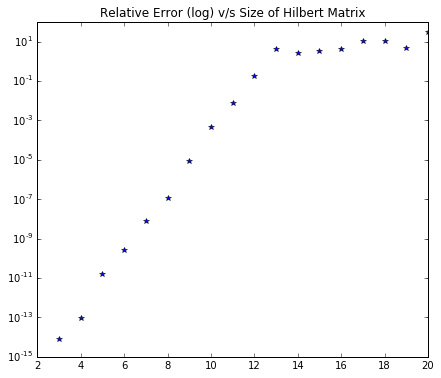

In [47]:
plt.figure(figsize=(7,6))
plt.semilogy(np.arange(3,21), err, '*b')
plt.title('Relative Error (log) v/s Size of Hilbert Matrix')
plt.show()

### b)

A relation between $||x||$ and $||\widehat{x}||$ can be stated as:

$$ \underbrace{ \frac{||x-\widehat{x}||}{||x||} }_{\text{Forward relative error}} \leq \kappa(A) \underbrace{ \frac{||b-A\widehat{x}||}{||b||} }_{\text{Backward relative error}} $$

This says us that there exist a component of the forward error, that is _beyond of our control_, since a huge condition number of $A$ will give a huge upper bound.

In [52]:
rhs = []
for i in range(3,21):
    H = build_hilbert(i,i)
    x = np.ones(i, dtype=float)
    b = np.dot(H,x)
    x_approx = np.linalg.solve(H,b)
    kappa = np.linalg.cond(H, p=2)
    rhs.append(kappa*np.linalg.norm(b-np.dot(H,x_approx), ord=2)/np.linalg.norm(b, ord=2))
    print('Condition number of H({0}x{0}): {1}'.format(i, kappa))
rhs = np.asarray(rhs)

Condition number of H(3x3): 524.056777586
Condition number of H(4x4): 15513.7387389
Condition number of H(5x5): 476607.250242
Condition number of H(6x6): 14951058.6409
Condition number of H(7x7): 475367354.946
Condition number of H(8x8): 15257574754.9
Condition number of H(9x9): 4.9315286753e+11
Condition number of H(10x10): 1.60246795566e+13
Condition number of H(11x11): 5.2197577866e+14
Condition number of H(12x12): 1.64317378897e+16
Condition number of H(13x13): 1.57757888933e+18
Condition number of H(14x14): 5.82770617424e+17
Condition number of H(15x15): 7.11217908457e+17
Condition number of H(16x16): 3.07410923163e+17
Condition number of H(17x17): 6.94337669285e+17
Condition number of H(18x18): 1.15149397304e+18
Condition number of H(19x19): 4.70707491819e+17
Condition number of H(20x20): 2.69378744008e+18


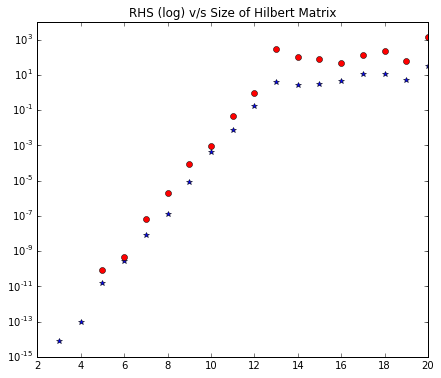

In [65]:
plt.figure(figsize=(7,6))
plt.semilogy(np.arange(3,21), err, '*b')
plt.semilogy(np.arange(3,21), rhs, 'or')
plt.title('RHS (log) v/s Size of Hilbert Matrix')
plt.show()

As can be seen in the plot above. the inequality holds. The right hand side is always greater than the backward relative error (left hand side).

### c) 



The solution is to use preconditioners. If we want to solve the system $Ax=b$, an option is to multiply by both side by a matrix $P^{-1}A x = P^{-1}b \leftrightarrow \tilde{A}x = \tilde{b}$, so that the condition number satisfies $\text{cond}(\tilde{A}) \leq \text{cond}(A)$. This can be achieve for example, with an incomplete LU decomposition (That approximates the inverse of A).

In [ ]:
A = np.array([[ 0.4445,  0.4444, -0.2222],
              [ 0.4444,  0.4445, -0.2222],
              [-0.2222, -0.2222,  0.1112]])

b = np.array([[ 0.6667], 
              [ 0.6667], 
              [-0.3332]])

M2 = spla.spilu(A)
M_x = lambda x: M2.solve(x)
M = spla.LinearOperator((3,3), M_x)

x = spla.gmres(A,b,M=M)

print x

### References for question II

[1] Numerical Linear Algebra, Trefethen. Chapter III: Conditioning and Stability.

### <div id='3' />
## Question III

### a)
The implementation below ```naive_root_finder``` finds the roots of the quadratic equation with the traditional formula: $\displaystyle x = \frac{-b \mp \sqrt{b^2-4ac}}{2a}$

In [230]:
def P(x):
    return (2.*x**2)+(1e9*x)+(1.)

In [231]:
def naive_root_finder(a, b, c):
    disc = b**2-4*a*c
    return ((-b+disc**0.5)/(2.*a), (-b-disc**0.5)/(2.*a))

### b) 
The problem appears when we try to evaluate numerically the root $\displaystyle x = \frac{-b + \sqrt{b^2-4ac}}{2a}$. Since $b^2 >> 4ac \sim c$, when the computer evaluates $b^2-4ac$ it returns $b^2$. This is due to the problem of loss of significance, i.e, when adding both numbers on floating point representation, none of the the bits of $b^2$ are modified by $-4ac$. As result we get that $\displaystyle x = \frac{-b + \sqrt{b^2-4ac}}{2a} = \frac{-b+b}{2a}=0$.

In [232]:
r0 = naive_root_finder(2.,1e9,1.)
print(r0)
print(P(r0[0]))
print(P(r0[1]))

(0.0, -500000000.0)
1.0
1.0


### c)

The solution is to express such problematic root in a more clever way:

$$ \frac{-b+\sqrt{b^2-4ac}}{2a} \cdot \frac{-b-\sqrt{b^2-4ac}}{-b-\sqrt{b^2-4ac}} = \frac{b^2-(b^2-4ac)}{2a(-b-\sqrt{b^2-4ac})} = \frac{2c}{-b-\sqrt{b^2-4ac}}$$

This way, when the problem of loss of significance appears, the result will be $-\frac{c}{b} \neq 0$.

In [233]:
def clever_root_finder(a, b, c):
    disc = b**2-4*a*c
    return (2*c/(-b-sqrt(disc)), (-b-sqrt(disc))/(2.*a))

### d) 
The new root are shown below. Note that when we evaluate the second root, doesn't return $0$. This is due to the loss of significance of the evaluation of the discriminant.

In [234]:
r1 = clever_root_finder(2.,1e9,1.)
print(r1)
print(P(r1[0]))
print(P(r1[1]))

(-1e-09, -500000000.0)
0.0
1.0


### e)

The approach here, is to compute the Taylor expansion of the well-known solution  $x = \frac{-b \mp \sqrt{b^2-4ac}}{2a}$ with known $a,c$. Then the roots can be expressed as functions of $b$:
$$
r_1(b) = \frac{1}{4} \left(-b+\sqrt{b^2-8}\right)  \ \ \ \ \ \ r_2(b) = \frac{1}{4} \left(-b-\sqrt{b^2-8}\right)
$$
If we divide by $b$ both expressions (assuming $b \neq 0$), we get:
$$
\tilde{r}_1(b) = \frac{1}{4} \left(-1+\sqrt{1-\frac{8}{b^2}}\right) \ \ \ \ \ \ \ \tilde{r}_2(b) = \frac{1}{4} \left(-1-\sqrt{1-\frac{8}{b^2}}\right)
$$
by taking the 5th order Taylor expansion of both expressions, centered at $b=10^9$ results:
\begin{align}
r_1(b) &\approx \tilde{r}_1(b) \cdot b \approx -2\cdot 10^{-17}b + 7\cdot 10^{-26}b^2 - 1.05 \cdot 10^{-34} b^3 + 8.4 \cdot 10^{-44}b^4 - 3.5 \cdot 10^{-53}b^5 + 6 \cdot 10^{-63} b^6 \\
r_2(b) &\approx \tilde{r}_2(b) \cdot b \approx -0.5 b - 7 \cdot 10^{-26}b^2 + 1.05 \cdot 10^{-34}b^3 - 8.4 \cdot 10^{-44} b^4 + 3.5 \cdot 10^{-53} b^5 - 6 \cdot 10^{-63} b^6
\end{align}
here we multiply the Taylor expansions of $\tilde{r}_1(b)$ and $\tilde{r}_2(b)$ by $b$, since we previously we divide them by $b$. (The full derivation can be seen in the attached file: `quadratic-taylor.nb`).

Evaluating the 5th order Taylor expansions at $b=10^9$ we get the roots:
$$
r_1 = -1.98523 \cdot 10^{-23} \ \ \ \ \ r_2 = -5\cdot 10^8
$$
which are very similar to the ones found with `clever_root_finder()`. Higher order expansions, give more accurate solutions for $r_1$ (closer to $0$).

### References for question III
[1] Numerical Analysis, Timothy Sauer. Chapter 1: Solving Equations. 

<div id='4' />
## Question IV

### Question 1.

First we have to recall that FPI is locally convergent, i.e, the method converges to $r$ for initial guesses sufficiently close to $r$. In other words, there must exist a neighborhood $(r-\epsilon, r+\epsilon)$ such that the _fixed point function_ satisfies $g'(x)<1$.

Now suppose that there exist two fixed points $r_1,r_2$ ($r_1<r_2$ without loss of generality) on the closed interval $[a,b]$. We can take a neighborhood around $r_1$ that contains $r_2$: $\Omega = (r_1-\epsilon_1, r_2+\epsilon_2) \ \text{with} \ \epsilon_1,\epsilon_2 > 0$. According to _theorem 1.6 Numerical Analysis - Timothy Sauer_, given that $|g'(x)|<1 \ \forall \ x \in \Omega$, and in particular $|g'(r_1)|<1$, any initial guess $x_0 \in \Omega$ will converge to $r_1$. However, with the same argument, since $|g'(r_2)|<1$ and $|g'(x)|<1 \ \forall \ x \in \Omega$, any initial guess will on $\Omega$ will converge to $r_2$. That is a contradiction. Then, can not exist two fixed points on a closed interval $\blacksquare$.


### Question 2.

Three different possibilities are shown next:

1. $\ \ x = g_1(x) = f(x)+x$
2. $\ \ x = g_2(x) = \frac{x(f(x)+\alpha)}{\alpha} \ \ \ (/+\alpha \ / \cdot x \ / \cdot 1/\alpha)$
3. $\ \ x = g_3(x) = x e^{f(x)} \ \ \ \ \ \ \ (/e^{(\cdot)} \ /\cdot x)$ 

The necessary restrictions to reach $r$ are: $|g_i'(r)|<1$ and a starting guess $x_0$ close enough to $r$.

### Question 3.

Two equivalent expressions for $x^3+x=1$ can be written:

$$ x^3+x=1\ \  /\cdot x \leftrightarrow x = g_1(x) = x^4+x^2 \ \ \text{with} \ \ g_1'(x)=4x^3+2x \  \big|_{x=1} = 6  $$

$$ x^3+x=1 \leftrightarrow \ x(x^2+1)=1 \ \leftrightarrow \ x=g_2(x)=\frac{1}{x^2+1}  \ \ \text{with} \ \ g_2'(x)=\frac{-2x}{(1+x^2)^2} \ \bigg|_{x=1} = -\frac{1}{2}$$

clearly the first will fixed-point iteration will diverge, while the second will converge.

### Question 4.

The second order Taylor expansion of $f$ centered at $x_i$ (solution at step $i$) is:

$$ f(x) = f(x_i) + f'(x_i)(x-x_i)+\frac{f''(c_i)}{2}(x-x_i)^2$$

where $c_i$ is between $x_i,x$, acording to Taylor. If we evaluate the last expression on the root $r$, we have:

\begin{align}
 0 &= f(x_i) + f'(x_i)(r-x_i)+\frac{f''(c_i)}{2}(r-x_i)^2 \ \ \ / \cdot 1/f'(x_i) \\
 0 &= \frac{f(x_i)}{f'(x_i)} + (r-x_i)+\frac{f''(c_i)}{2f'(x_i)}(r-x_i)^2 \\
 \underbrace{x_i - \frac{f(x_i)}{f'(x_i)}}_{x_{i+1}} - r &= \frac{(r-x_i)^2}{2}\frac{f''(c_i)}{f'(x_i)}  \ \ \ / \ ||\cdot|| \\
 e_{i+1} &= e_{i}^2 \bigg|\frac{f''(c_i)}{2f'(x_i)} \bigg|
\end{align}

Now since $c_i$ lies between $r$ and $x_i$, and $x_i \rightarrow r$ as $i\rightarrow \infty$, $c_i$ should converge to $r$:

$$ \lim_{i \rightarrow \infty} \frac{e_{i+1}}{e_i^2} = \bigg|\frac{f''(r)}{2f'(r)} \bigg| \ \ \ \blacksquare $$

### Question 5.

Quadratically convergence fails for roots with multiplicity greater than $1$. This can be seen (not a formal proof) with monomial functions $f(x)=x^m$ for which Newton methods gives:
$$
x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)} = x_i - \frac{x_i^m}{m x_i^{m-1}} = \frac{m-1}{m} x_i
$$
linear convergence. The way to fix it is the __Modified Newton's Method__ as stated in _Theorem 1.13 - Numerical Analysis - Timothy Sauer_:
$$
x_{i+1} = x_i - \frac{m\ f(x_i)}{f'(x_i)}
$$
where $f$ is $(m+1)-$times continuously differentiable, with a root $r$ of multiplicity $m>1$. Let's see how it work on monomial functions (again, this is not a formal proof):
$$
x_{i+1} = x_i - \frac{m\ f(x_i)}{f'(x_i)} = x_i - \frac{m \ x_i^m}{m \ x_i^{m-1}} = x_i - x_i = 0
$$
It converges in $1$ iteration!.

### References for question IV
[1] Numerical Analysis, Timothy Sauer. Chapter 1: Solving Equations. 

<div id='5' />
## Question V

### a)

The BVP will be solved, by using the shooting method. First, the second order ODE is splitted into two first order equations:

\begin{align}
y_1' &= y_2 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  y_1(0)=0 \\ 
y_2' &= - \frac{(y_1 +(1+\epsilon)y_2)}{\epsilon} \ \ \ \ \ y_2(0)=\gamma
\end{align}
subject to $y_2(1)=1$.

In [121]:
def odefunc(Y, epsilon=0.1):
    y1 = Y[0]
    y2 = Y[1]
    return np.array([y2, -(y1+(1+epsilon)*y2)/epsilon])

def euler_int(odefunc, dt, gamma, t0=0., tf=1.):
    n_iter = int((tf-t0)/dt)
    Y = np.empty((n_iter+1,2))
    Y[0,0] = 0.
    Y[0,1] = gamma
    for i in range(n_iter):
        Y[i+1] = odefunc(Y[i])*dt + Y[i]
    return Y[:,0]
    
def F(gamma):
    sol = euler_int(odefunc, 0.01, gamma)
    return sol[-1]-1.

In [125]:
"""
Solving F by Brent's method
"""
bgamma = sp.optimize.brentq(F, 20., 30.)
print("Best gamma= {0}".format(bgamma))

Best gamma= 24.5897756125


In [135]:
dx = 0.05
ode_sol = euler_int(odefunc, dx, bgamma)
x = np.linspace(0., 1., int(1./dx)+1)

### b)

The exact solution was obtained with `DSolve[]` `Mathematica`'s function, an is shown below.

In [131]:
def y(x, epsilon=0.1):
    return (np.exp(1.+1/epsilon)/(np.exp(1./epsilon)-np.exp(1))) * (np.exp(-x)-np.exp(-x/epsilon))

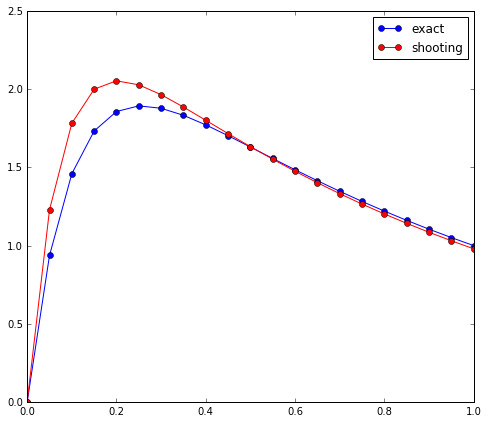

In [134]:
plt.figure(figsize=(8,7))
plt.plot(x, y(x, epsilon=1e-1), 'bo-', label='exact')
plt.plot(x, ode_sol, 'ro-', label='shooting')
plt.legend()
plt.show()

### c)

Since the numerical solution was solved inside the interval $[0,1]$  (with corresponding boundary conditions on extremes), then the solution is valid just in this interval, and no extrapolation could be done.

### d)
By setting lower $dx$ steps in the numerical integration step, it is possible to get more accurate solutions. However a better approach to get more accuracy, is the _finite differences method_, which gives us better theoretical error analysis.  

### e) 
As $t\rightarrow \infty$, the problem becomes:
$$
y'(x)=-y(x) \ \ \ \ y(0)=0 \ \ \text{and} \ \ y(1)=1.
$$
which corresponds to a decaying exponential (one of the boundary conditions must be relaxed in order to get consistency).

### References for question V
[1] Numerical Analysis, Timothy Sauer. Chapter 6: Ordinary Differential Equations. 

<div id='6' />
## Question VI

We want to find the SVD decomposition of $X(I - v_1 v_1^*) = U \Sigma V^* (I - v_1 v_1^*)$. To achieve that, we write the SVD as the equivalent sum of rank-1 matrices:
\begin{align}
X(I - v_1 v_1^*) = U \Sigma V^* (I - v_1 v_1^*) &= U \Sigma V^* - \left(\sigma_1 u_1 v_1^* + \sigma_2 u_2 v_2^* + \cdots + \sigma_n u_n v_n^*\right)v_1 v_1^* \\
&= U \Sigma V^* - \left(\sigma_1 u_1 \underbrace{v_1^*v_1}_{=1} v_1^* + \sigma_2 u_2 \underbrace{v_2^* v_1}_{=0} v_1^* + \cdots + \sigma_n u_n \underbrace{v_n^* v_1}_{=0} v_1^*\right) \\
&= U \Sigma V^* - \sigma_1 u_1 v_1^* \\
&= \sigma_2 u_2 v_2^* + \cdots + \sigma_n u_n v_n^*
\end{align}
which is equivalent to setting $\sigma_1=0$ on the original SVD decomposition (and reordering the $u$ and $v$ vectors, according to the magnitude of $\sigma$).

### References for question VI
[1] Numerical Linear Algebra, Threfethen. Chapter I: Fundamentals.

<div id='7' />
## Question VII

We want to solve the problem:
\begin{align}
\text{maximize}_{w \in \mathbb{R}^n} & \ ||X w||_2^2 \\
\text{subject to} & \ ||w||_2=1
\end{align}
For that, we will consider the _complete_ SVD decomposition $X = U \Sigma V^*$, and note that:
$$
||Xw||_2 = ||U \Sigma V^* w ||_2 = ||\Sigma V^* w||_2 \leq ||\Sigma||_2 \underbrace{||V^* w||}_{=||w||=1} = \sigma_{\text{max}}(\Sigma) = \sigma_1
$$
(here we make use of properties of unitary matrices). Since the obtained bound can be reached by setting $w=v_1$:
$$
||Xv_1||_2 = ||U \Sigma V^* v_1||_2 = || \Sigma V^* v_1 ||_2  = || \Sigma \ [1 \ 0 \ \cdots \ 0]^T ||_2 = ||[\sigma_1 \ 0 \ \cdots \ 0]^T ||_2 = \sigma_1
$$
we conclude that the maximization is obtained for $w=v_1$, with maximum $\sigma_1^2$.

### References for question VII
[1] Numerical Linear Algebra, Threfethen. Chapter I: Fundamentals.

<div id='8' />
## Question VIII

Now, we want to solve:
\begin{align}
\text{maximize}_{w \in \mathbb{R}^n} & \ ||X(I-v_1 v_1^*) w||_2^2 \\
\text{subject to} & \ ||w||_2=1
\end{align}
As we saw in _Question VI_, the SVD of $X(I-v_1 v_1^*) = \tilde{U} \tilde{\Sigma} \tilde{V}^* = U \tilde{\Sigma} V^*$, where the only difference is that in $\tilde{\Sigma}$ we have $\sigma_1 = 0$.

Following the same derivation as in _Question VII_, we note that:
$$
|X(I-v_1 v_1^*) w||_2 \leq \sigma_{\text{max}}(\tilde{\Sigma}) = \sigma_2
$$
and that bound is reached when $w=v_2$:
$$
||X(I-v_1 v_1^*) v_2||_2 = ||U \tilde{\Sigma} V^* v_2||_2 = || \tilde{\Sigma} V^* v_2 ||_2  = || \tilde{\Sigma} \ [1 \ 0  \ \cdots \ 0]^T ||_2 = ||[\sigma_2  \ 0 \ \cdots \ 0]^T ||_2 = \sigma_2
$$
we conclude that the maximization is obtained for $w=v_2$, with maximum $\sigma_2^2$.

### References for question VIII
[1] Numerical Linear Algebra, Threfethen. Chapter I: Fundamentals.

<div id='9' />
## Question IX

First thing to note is the support of each function: $\text{supp}(\widetilde{H}_a)=[-0.5a,0.5a]$ and $\text{supp}(\widetilde{H}_b)=[-0.5b,0.5b]$. Then, the convolution of both is:

\begin{align}
F(x) &= \int_{-\infty}^{\infty} \widetilde{H}_a(y)\widetilde{H}_b(x-y) dy \\
     &= \frac{1}{ab} \int_{-0.5a}^{0.5a} H\left(\frac{x-y}{b}\right) dy \\
\end{align}
Now we have to analyze five cases. For simplicity we will suppose that $a\geq b$:
1. Without overlap (on the left): $x +0.5b < -0.5a \  \Leftrightarrow \ x < -0.5(a+b)$.
2. Overlap on the left: $ x + 0.5 b \geq -0.5 a \wedge x - 0.5b < -0.5 a \ \Leftrightarrow \ -0.5(a+b)\leq x < 0.5(b-a)$.
3. Completely contained: $ x + 0.5 b < 0.5 a \wedge x - 0.5b \geq -0.5 a \ \Leftrightarrow \ 0.5(b-a)\leq x < 0.5(a-b)$.
4. Overlap on the right: $ x + 0.5 b \geq 0.5 a \wedge x - 0.5b < 0.5 a \ \Leftrightarrow \ 0.5(a-b)\leq x < 0.5(a+b)$.
5. Without overlap (on the right): $x - 0.5 b \geq 0.5 a \leftrightarrow x \geq 0.5(a+b)$.

Clearly when there is no overlap, then the convolution is $0$. In the completely contained case, the integral (in the convolution) is just the area of the rectangle of sides $b$ and $1$, so:
$$
F(x) = \frac{1}{ab} \int_{-0.5b}^{0.5b} dy = \frac{1}{ab} b  = \frac{1}{a}.
$$
For the _overlap on the left case_ the convolution will give:
$$
F(x) = \frac{1}{ab} \int_{-0.5a}^{x+0.5b} dy = \frac{1}{ab}\left(x+0.5(b-a) \right)
$$
And for the _overlap on the right case_ the convolution will give:
$$
F(x) = \frac{1}{ab} \int_{x-0.5b}^{0.5a} dy = \frac{1}{ab}\left(0.5(a+b)-x \right)
$$

Summarizing the results:
$$
F(x) =
\begin{cases} 
      0 & x<-0.5(a+b) \\
      \frac{1}{ab}\left(x+0.5(b-a) \right) & -0.5(a+b)\leq x < 0.5(b-a) \\
      \frac{1}{a} & 0.5(b-a)\leq x < 0.5(a-b) \\
      \frac{1}{ab}\left(0.5(a+b)-x \right) & 0.5(a-b)\leq x < 0.5(a+b) \\
      0 & x>0.5(a+b)
\end{cases}
$$
The case $b>a$ can be derived in the same way.

<div id='10' />
## Question X

The following PDE will be solved, by using the Fourier Transform:
\begin{align}
u_t - k u_{xx} &= 0 \\
u(x,0) &= f(x)
\end{align}
for $x \in \mathbb{R}$ and $t>0$. Some known properties of the FT are used:
* (1) $\hat{u_t}(\omega,t) = \frac{\partial}{\partial t}\hat{u}(\omega,t)$
* (2) $\hat{u_{xx}}(\omega,t) = (i\omega)^2 \hat{u}(\omega,t) = -\omega^2 \hat{u}(\omega,t)$
* (3) $\widehat{f(x) \star g(x)} = \hat{f}(\omega) \cdot \hat{g}(\omega) \ $   (FT maps convolutions to products).

By applying the FT to both sides of the heat equation, we get:
$$
\frac{\partial}{\partial t}\hat{u}(\omega,t)+k \omega^2 \hat{u}(\omega,t) = 0 \ \ \ \ \text{and} \ \ \ \ \hat{u}(\omega,0)=\hat{f}(\omega).
$$
multiplying both sides of the above equation, by the integration factor $\displaystyle e^{k\omega^2 \ t}$:
$$
\frac{\partial}{\partial t}\left( \hat{u}(\omega,t) e^{k\omega^2 \ t} \right) = 0 \ \rightarrow \ \hat{u}(\omega,t) e^{k\omega^2 \ t} = g(\omega) \ \rightarrow \ \hat{u}(\omega,t) = g(\omega) e^{-k\omega^2 \ t}
$$
and since $\hat{u}(\omega,0)=g(\omega) e^0 = \hat{f}(\omega)$, then:
$$
\hat{u}(\omega,t) = \hat{f}(\omega) e^{-k\omega^2 \ t}
$$
Now we want to return to the _spatial domain_ ($x$). After applying the (3) property, we found the inverse Fourier transform of $e^{-k\omega^2 \ t}$:
$$
\frac{1}{2 \pi}\int_{-\infty}^{\infty} e^{-k\omega^2 \ t} e^{i \omega t}d\omega = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-k\omega^2 t + i \omega t} d\omega = \frac{1}{\sqrt{4 \pi k t}}e^{-\frac{1}{4kt}x^2}
$$
finally we get the general solution:
$$
u(x,t) = \underbrace{\frac{1}{\sqrt{4 \pi k t}}e^{-\frac{1}{4kt}x^2}}_{\phi(x,t)} \star f(x) = \int_{-\infty}^{\infty} \phi(x-y,t)f(y)dy = \frac{1}{\sqrt{4 \pi k t}} \int_{-\infty}^{\infty} e^{-\frac{(x-y)^2}{4kt}} f(y) dy
$$

<div id='11' />
## Question XI

### a) Taylor expansion approach

In [2]:
mu = 1.
t0 = 0.
tf = 10.

In [3]:
"""
Approximated solution by means of a 5th order Taylor expansion
centered at t=0.
"""
def y_approx(t, mu=mu):
    return 2. - t**2 + mu*t**3 + ((2-18*mu**2)/24)*t**4 + ((-54*mu-3*mu*(2-18*mu**2))/120)*t**5

### b) Numeric integrator approach

Since we have a second order ODE, we can define to extra variables $y_1$ and $y_2$ in 
order to get a system of ODEs, but of first order. Let $y_1 = y$ and $y_2 = \dot{y}$ ($t$ is omitted for notation convenience). Then we have:
\begin{align}
\dot{y_1} &= \dot{y} = y_2 \\
\dot{y_2} &= \ddot{y} = \mu (1-y_1^2)y_2 - y_1
\end{align}
which could be solved with numerical integrators, with _Euler_ or _Runge Kutta_ methods (for example).

In [4]:
def odefunc(Y, mu=mu):
    y1 = Y[0]
    y2 = Y[1]
    return np.array([y2, mu*(1.-y1**2.)*y2-y1])

def euler_int(odefunc, dt, t0=t0, tf=tf):
    n_iter = int((tf-t0)/dt)
    Y = np.empty((n_iter+1,2))
    Y[0,0] = 2.
    Y[0,1] = 0.
    for i in range(n_iter):
        Y[i+1] = odefunc(Y[i])*dt + Y[i]
    return Y[:,0]

### c) Comparison

In [6]:
dt = 0.05
euler_sol = euler_int(odefunc, dt, t0=t0, tf=tf)

In [7]:
times = np.linspace(t0, tf, int(tf/dt)+1)
taylor_sol = y_approx(times)

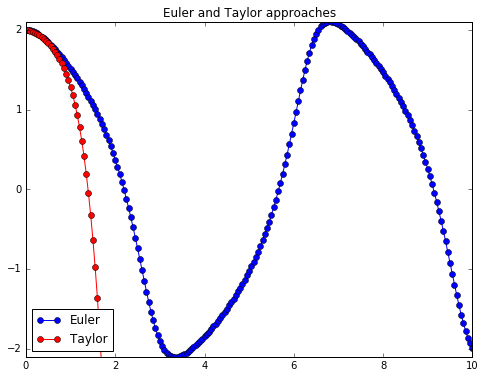

In [10]:
plt.figure(figsize=(8,6))
plt.plot(times, euler_sol, 'bo-', label='Euler')
plt.plot(times, taylor_sol, 'ro-', label='Taylor')
plt.title('Euler and Taylor approaches')
#plt.xlim([-0.1,1.1])
plt.ylim([-2.1,2.1])
plt.legend(loc='lower left')
plt.show()

The Figure above, shows that both solutions are almost the same at $t$ close to $0$. However, they diverge to each other as $t \rightarrow \infty$. This is due to the Taylor approach centered at $t=0$ (approximates well for $t$ close to $0$ only). So the Euler integrator gives a more robust solution in this case.

**Note**: A better approximation for Taylor could be achieved by taking high order terms in the expansion.

### References for question XI
[1] Numerical Analysis, Timothy Sauer. Chapter 6: Ordinary Differential Equations.

<div id='12' />
## Question XII

In order to compute such integral, the _Cauchy's Integration Formula_ / _Cauchy's Differentiation Formula_ is needed.

__Cauchy's Differentiation Formula.__ Let $f$ be an analytical function (infinitely complex differentiable) and let $\gamma$ be an oriented circular path, with $D$ the region bounded by $\gamma$. Then for every $a$ in the interior of $D$:
$$
f^{(n)}(a) = \frac{n!}{2\pi i} \oint_\gamma \frac{f(z)}{(z-a)^{n+1}}\, dz.
$$

Applying such formula we get:

* $\displaystyle f(0) = e^0 = \frac{1}{2 \pi i}\oint_{\gamma} \frac{e^z}{z}dz \rightarrow \oint_{\gamma} \frac{e^z}{z}dz = 2 \pi  i$
* We take the partial fraction decomposition $\displaystyle \frac{1}{z(z-1)} = \frac{1}{z-1} - \frac{1}{z}$, and the additive property of contour integrals:
$$ \oint_{\gamma} \frac{e^z}{z(z-1)} dz = \oint_{\gamma}\frac{e^z}{z-1}dz - \oint_{\gamma}\frac{e^z}{z}dz$$
the first integral can be calculated with $\displaystyle f(1)=e^1 = \frac{1}{2 \pi  i}\oint_{\gamma}\frac{e^z}{z-1}dz$, and the second integral was calculated previously. Then:
$$ \oint_{\gamma} \frac{e^z}{z(z-1)} dz = 2\pi i e - 2 \pi i = 2 \pi i (e-1)$$
* $\displaystyle f^{(2)}(0)= e^0 = \frac{2!}{2\pi i} \oint_{\gamma} \frac{e^z}{z^3}dz \rightarrow \oint_{\gamma} \frac{e^z}{z^3}dz = \pi i$

### References for quesion XII
[1] https://en.wikipedia.org/wiki/Cauchy%27s_integral_formula 

[2] http://math.stackexchange.com/questions/376428/cauchy-integral-theorem-of-ez-z-1

<div id='13' />
## Question XIII

First, by means of partial fractions the function could be decomposed as:
$$
f(z)=\frac{1}{\left( z-1\right) \left( z-2\right) }=\frac{1}{z-2}-\frac{1}{z-1}
$$

Lets call each region $R_1: 1 < |z| < 2$ and $R_2: |z|>2$. For $R_1$ we expand each partial fraction as a geometric series:

$$
\frac{1}{z-2} =\frac{-1/2}{1-z/2}=\sum_{n=0}^{\infty }\left( -\frac{1}{2}
\right) \left( \frac{z}{2}\right) ^{n} = \sum_{n=0}^{\infty }-\frac{1}{2^{n+1}}z^{n} \ \ \ |z|<2
$$
and
$$
\frac{1}{z-1} =\frac{1/z}{1-1/z}=\sum_{n=0}^{\infty }\frac{1}{z}\left(
\frac{1}{z}\right) ^{n} = \sum_{n=0}^{\infty }\frac{1}{z^{n+1}} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \   |z|>1
$$
by adding term by term the two last results we get:
$$
f(z) = -\left( \sum_{n=0}^{\infty}\frac{z^n}{2^{n+1}} + \sum_{n=1}^{\infty}\frac{1}{z^n} \right) \ \ \ \text{with} \ \ 1 <|z|<2
$$

In an analogous way, we can compute the Laurent expansion on $R_2$. Similarly, expanding each partial fraction as a geometric series:
$$
\frac{1}{z-2} =\frac{1}{z\left( 1-2/z\right) }=\frac{1}{z}
\sum_{n=0}^{\infty }\left( \frac{2}{z}\right) ^{n} = \frac{1}{z}\sum_{n=0}^{\infty }2^{n}\frac{1}{z^{n}}=\sum_{n=0}^{\infty}2^{n}\frac{1}{z^{n+1}} \ \ \ \  \left\vert z\right\vert >2
$$
and
$$
\frac{1}{z-1} = \frac{1}{z\left( 1-1/z\right) } =  \frac{1}{z}\sum_{n=0}^{\infty }\left( \frac{1}{z}\right)
^{n}=\sum_{n=0}^{\infty }\frac{1}{z^{n+1}} \ \ \ \ \ \ \ \ \ \qquad \ \ \ \qquad \ \left\vert z\right\vert >1
$$
adding again term by term, we get:
$$
f(z) = \sum_{n=0}^{\infty }\frac{1}{z^{n+1}}(2^{n}-1)\ \ \ \text{with} \ \  \left\vert z\right\vert > 2
$$

An sketch of the regions is shown below.
<img src="sketch.png" style="width: 300px;">

### References for question XIII
[1] http://math.stackexchange.com/questions/79012/finding-the-laurent-series-of-fz-1-z-1z-2

<div id='14' />
## Question XIV

### a) 

We will consider the following _'polynomial'_ matrix:
$$
A = \left[1 \ | \ x \ | \ x^2 \ | \ x^3 \ \right]
$$
In order to perform a QR factorization, a similar _Gram Shmidt Orthogonalization_ could be performed, so we can get a orthonormal basis of the vector space $<1,\ x,\ x^2,\ x^3>$:
\begin{align}
y_1(x) &= 1  \ \ \rightarrow q_1(x) = \frac{y_1(x)}{||y_1(x)||} = 1 \\
y_2(x) &= x - q_1(x) <q_1(x), x> \ \ \rightarrow q_2(x) = \frac{y_2(x)}{||y_2(x)||} = x \\
y_3(x) &= x^2 - q_1(x) <q_1(x), x^2> - q_2(x) <q_2(x), x^2> \ \ \rightarrow q_3(x) = \frac{y_3(x)}{||y_3(x)||} = \frac{3}{2}x^2-\frac{1}{2}\\
y_4(x) &= x^3 - q_1(x) <q_1(x), x^3> - q_2(x) <q_2(x), x^3> - q_3(x) <q_3(x),x^3> \ \ \rightarrow q_4(x) = \frac{y_4(x)}{||y_4(x)||} = \frac{5}{2}x^3 - \frac{3}{2}x
\end{align}
the entries $r_{i,j}$ of the $R$ matrix, can be computed as $\displaystyle r_{ij} = \int_{-1}^{1} \overline{q_i(x)}a_j(x)\ dx$. 

** Note: ** The polynomials shown above were scaled so that $y_k(1) = 1$, which corresponds to the scalar multiples of the _Legendre polynomials_.

The following codes implements such concept:

In [17]:
"""
Function to build polynomial matrices
"""
def buildA1(n):
    x = sym.Symbol('x')
    A = [x**i for i in range(n)]
    return A

def buildA2(n):
    x = sym.Symbol('x')
    A = [sym.sin(2*sym.pi*(i)*x) for i in range(1,n)]
    A.insert(0,1.)
    return A

In [18]:
A1 = buildA1(5)
print(A1)

[1, x, x**2, x**3, x**4]


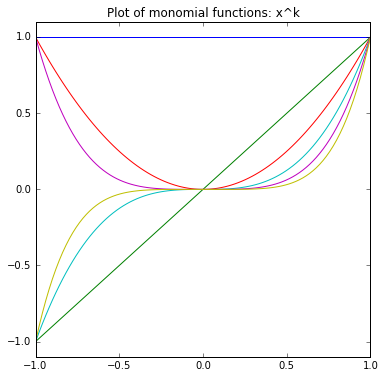

In [22]:
plt.figure(figsize=(6,6))
for i in range(0,6):
    x = np.linspace(-1,1,100)
    plt.plot(x, x**i)
    plt.ylim(-1.1,1.1)
plt.title('Plot of monomial functions: x^k')
plt.show()

In [43]:
def integrate(func):
    x = sym.Symbol('x')
    return sym.Integral(func, (x,-1,1)).evalf()

In [44]:
def gs_orthogonalization(A):
    x = sym.Symbol('x')
    n = len(A)
    Q = list()
    R = np.empty((n,n))
    for j in range(n):
        y = A[j]
        for i in range(j-1):
            R[i,j] = integrate(Q[i]*A[j])
            y -= R[i,j]*Q[i]
        y = y/sqrt(integrate(y*y))
        Q.append(y)
    return Q,R

In [45]:
Q,R = gs_orthogonalization(A1)
print('Q matrix: \n {0} \n'.format(Q))
#print('R matrix: \n {0} \n'.format(R))

Q matrix: 
 [0.707106781186547, 1.22474487139159*x, 2.37170824512628*x**2 - 0.790569415042095, 4.67707173346743*x**3 - 2.80624304008046*x - 3.78007548626922e-100, 9.28077650307344*x**4 - 7.95495128834866*x**2 - 1.29918615363568e-99*x + 0.795495128834866] 



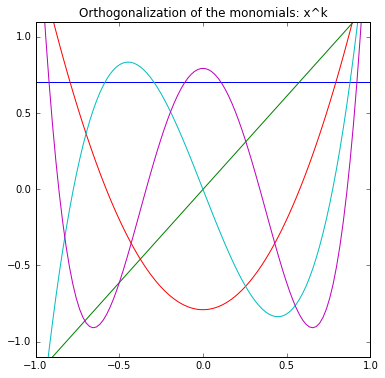

In [35]:
plt.figure(figsize=(6,6))
for q in Q:
    x = sym.Symbol('x')
    xx = np.linspace(-1,1,100)
    f = sym.lambdify(x, q, 'numpy')
    plt.ylim(-1.1,1.1)
    plt.plot(xx, f(xx)+0.*xx)
plt.title('Orthogonalization of the monomials: x^k')
plt.show()

### b)

Trying now with the matrix $A = \left[1 \ | \ \sin(2 \pi x) \ | \cdots \ | \ \sin(2\pi(n-1)x) \right]$, we get:

In [31]:
A2 = buildA2(5)
print(A2)

[1.0, sin(2*pi*x), sin(4*pi*x), sin(6*pi*x), sin(8*pi*x)]


In [32]:
Q,R = gs_orthogonalization(A2)
print('Q matrix: \n {0} \n'.format(Q))
#print('R matrix: \n {0} \n'.format(R))

Q matrix: 
 [0.7071067811865475, 1.0*sin(2*pi*x), 1.0*sin(4*pi*x) - 8.08214135186418e-101, 1.06448996000204e-109*sin(2*pi*x) + 1.0*sin(6*pi*x) - 8.08214135186418e-101, -2.12897992000408e-109*sin(2*pi*x) + 1.33061245000255e-110*sin(4*pi*x) + 1.0*sin(8*pi*x) - 8.08214135186418e-101] 



As we can see, the orthogonal functions in the columns of $Q$ are almost the same (by negligible numerical differences) as the functions in the columns of $A$. This means that the column space of $A$ was already an orthogonal basis!.

### c)
Now instead of using functions on the columns of the matrix $A$, we can use the instantiation of such functions in a grid of points in $[-1,1]$. As functions corresponds to elements of an infinite dimensional vectorial space, we can see this process as approximating such functions by a finite dimensional vector.

The function below build the numerical $A$ matrix, for the case of monomials functions.

In [16]:
def buildA(m,n):
    xx = np.linspace(-1,1,m)
    A = np.zeros((m,n))
    for i in range(n):
        A[:,i] = xx**i
    return A

No we build the corresponding numerical matrix whose columns are $\{1 , x^1, x^2, x^3, x^4 \}$, with $100$ points on the interval $[-1,1]$. Next the QR factorization is computed.

In [29]:
AA = buildA(100,5)
QQ,RR  = sp.linalg.qr(AA)

the results for the numerical orthogonalization are shown below (dotted). As can be noted, some scaling on the columns of $Q$ (numerical version) was done in order to match the plots. It's due to differences in the dimensions ($||\cdot||_2$) between monomials and arrays. 

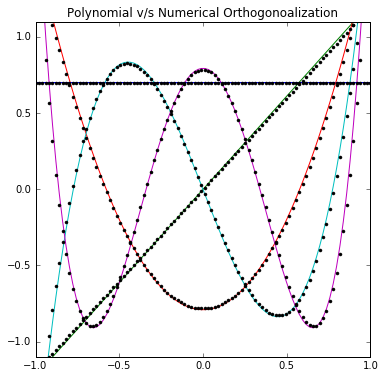

In [39]:
plt.figure(figsize=(6,6))
for q in Q:
    x = sym.Symbol('x')
    xx = np.linspace(-1,1,100)
    f = sym.lambdify(x, q, 'numpy')
    plt.ylim(-1.1,1.1)
    plt.plot(xx, f(xx)+0.*xx)     
for i in range(5):
    plt.plot(xx, -7*QQ[::-1,i], '.k')
plt.title('Polynomial v/s Numerical Orthogonoalization')
plt.show()

### References for question XIV
[1] Numerical Linear Algebra, Threfethen. Chapter 2: QR factorization and Least Squares.

<div id='15' />
## Question XV

The following expression is evaluated:
$$
f(x) = \sum_{i=1}^{n}\alpha_i \ \text{sinc}(x-x_i)
$$
at $x=x_j$ ($j=1,\ldots,m$), for fixed $\alpha_i$ and $x_i$. For operations count, no distinction will be made between addition and multiplication, and will be treated as FLOP (Floating Point Operation). Because $\text{sinc}(x)=\sin(x)/x$, and since `sin` is implemented as a processor instruction in most modern CPUs, we will count 2 FLOPs for each evaluation of $\text{sinc(x)}$. Then we have:
* $4$ FLOPs each term in the sum.
* $4n$ FLOPs each function evaluation.
* $4mn$ FLOPs the complete evaluation.

In order to avoid the speedup of `NumPy` _vectorized instructions_, the following implementation performs it sequentially:

In [4]:
@numba.jit('float32[:] (float32[:],float32[:],float32[:])')
def f(x, x0, alpha):
    m = x.shape[0]
    n = x0.shape[0]
    out = np.zeros(m)
    for j in range(m):
        for i in range(n):
            out[j] += alpha[i]*np.sinc(x[j]-x[i])
    return out

### Experiments for $x$

In [33]:
alpha = np.random.random(100)
x0 = np.linspace(0., 10., 100)
x1 = np.linspace(11.,20., 200)
x2 = np.linspace(11.,20., 400)
x3 = np.linspace(11.,20., 800)
x4 = np.linspace(11.,20., 1600)

In [35]:
%timeit -n 25 f(x1, x0, alpha)
%timeit -n 25 f(x2, x0, alpha)
%timeit -n 25 f(x3, x0, alpha)
%timeit -n 25 f(x4, x0, alpha)

25 loops, best of 3: 649 µs per loop
25 loops, best of 3: 1.28 ms per loop
25 loops, best of 3: 2.4 ms per loop
25 loops, best of 3: 4.4 ms per loop


### Experiments for $x_0$

In [36]:
x01 = np.linspace(0., 10., 200)
x02 = np.linspace(0., 10., 400)
x03 = np.linspace(0., 10., 800)
x04 = np.linspace(0., 10., 1600)
x = np.linspace(11.,20., 100)

In [37]:
%timeit -n 25 f(x, x01, alpha)
%timeit -n 25 f(x, x02, alpha)
%timeit -n 25 f(x, x03, alpha)
%timeit -n 25 f(x, x04, alpha)

25 loops, best of 3: 1.6 ms per loop
25 loops, best of 3: 2.93 ms per loop
25 loops, best of 3: 6.69 ms per loop
25 loops, best of 3: 13.3 ms per loop


As shown in the experiments above, the computation time seems to be linear on $m$ and $n$, i.e, $O(m)$ and $O(n)$, which reaffirms our theoretical result: $\text{computation time} = O(4mn)$. 

<div id='16' />
## Question XVI

First we have to recall Green's Theorem:


**Theorem:** Let $C$ be a piecewise smooth and closed curve on a 2D plane, and let $D$ be the region bounded by $C$. If $L,M: \mathbb{R}^2 \rightarrow \mathbb{R}$ are functions well defined on a open region containing $D$, with continuous partial derivatives there, then:
$$
\oint _{C}(L\,dx+M\,dy) = \int \int_{D}\left({\frac {\partial M}{\partial x}}-{\frac {\partial L}{\partial y}}\right)\,dx\,dy
$$
where the path of integration for $C$ is counterclockwise.

We now set $C$ as the polygon curve and $D$ the area bounded by the polygon. Since that area is $A = \iint_{D}dA$, we can achieve that by setting $M(x,y)=x$ and $L(x,y)=0$, and then:
$$
A = \oint_{C} x \ dy
$$
where $C$ is traversed in counterclockwise $(x_0,y_0)\rightarrow (x_1,y_1) \rightarrow \cdots$. If we split $C$ by the set of segments that connect two vertices: $C_k = (x_k,y_k)-(x_{k+1},y_{k+1})$, then we can write:
$$
C = C_0 \cup C_1 \cup \cdots \cup C_n
$$
with $(x_0,y_0)=(x_{n+1},y_{n+1})$. Due to the additive property of the line integral, the area $A$ is:
$$
A = \oint_{C_0} x \ dy + \oint_{C_1} x \ dy + \cdots \oint_{C_n} x \ dy
$$

To compute each integral, a parametrization of $C_k$ is needed:
$$
C_k : \{(x_{k+1}-x_k)t + x_k, \ (y_{k+1}-y_k)t + y_k \ \ \text{for} \ 0\leq t\leq 1 \}
$$

Substituting the parametrization in each subintegral:
$$
\oint_{C_k} x \ dy = \int_0^1 \left( (x_{k+1}-x_k)t+x_k) (y_{k+1}-y_k) \right) \ dt = \frac{(x_{k+1}+x_k)(y_{k+1}-y_{k})}{2}
$$
and finally the area of the polygon can be expressed as:
$$
A = \sum_{k=0}^n  \frac{(x_{k+1}+x_k)(y_{k+1}-y_{k})}{2}
$$

In [11]:
"""
Computation of regular polygon area through Green's theorem.
"""
def polygon_area(x,y):
    x_next = np.roll(x, shift=-1)
    y_next = np.roll(y, shift=-1)
    return 0.5*np.sum((x_next+x)*(y_next-y))

#### Example 1: Area of rectangle

In [15]:
x = np.array([0,3,3,0])
y = np.array([0,0,3,3])
polygon_area(x,y)

9.0

#### Example 2:  Area of triangle

In [14]:
x = np.array([0, 6, 3])
y = np.array([0, 0, 6])
print(polygon_area(x,y))

18.0


### References for question XVI
[1] http://mathinsight.org/greens_theorem_find_area